# Hierarchical Clustering

In [21]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns

In [22]:
# Import Dataset
df = pd.read_csv("E:\\Pycharm Projects\\Machine_Learning\\Unsupervised Machine Learning\\Hierarchical Clustering\\Wholesale customers data.csv")
df.head()

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

In [23]:
# Checking infornation about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


So, there are no null values and all cloumns are integer datatype

In [24]:
# Scale the data

# Normalize
df_scaled_normalize = normalize(df)
df_scaled_normalize = pd.DataFrame(df_scaled_normalize, columns = df.columns)

In [25]:
# Print Scaled Data
df_scaled_normalize.head()

Channel    Region     Fresh      Milk   Grocery    Frozen  \
0  0.000112  0.000168  0.708333  0.539874  0.422741  0.011965   
1  0.000125  0.000188  0.442198  0.614704  0.599540  0.110409   
2  0.000125  0.000187  0.396552  0.549792  0.479632  0.150119   
3  0.000065  0.000194  0.856837  0.077254  0.272650  0.413659   
4  0.000079  0.000119  0.895416  0.214203  0.284997  0.155010   

   Detergents_Paper  Delicassen  
0          0.149505    0.074809  
1          0.206342    0.111286  
2          0.219467    0.489619  
3          0.032749    0.115494  
4          0.070358    0.205294

In [26]:
# Take df_scaled_normalize in variable "X"
X = df_scaled_normalize.copy()

In [27]:
# Print X
X.head()

Channel    Region     Fresh      Milk   Grocery    Frozen  \
0  0.000112  0.000168  0.708333  0.539874  0.422741  0.011965   
1  0.000125  0.000188  0.442198  0.614704  0.599540  0.110409   
2  0.000125  0.000187  0.396552  0.549792  0.479632  0.150119   
3  0.000065  0.000194  0.856837  0.077254  0.272650  0.413659   
4  0.000079  0.000119  0.895416  0.214203  0.284997  0.155010   

   Detergents_Paper  Delicassen  
0          0.149505    0.074809  
1          0.206342    0.111286  
2          0.219467    0.489619  
3          0.032749    0.115494  
4          0.070358    0.205294

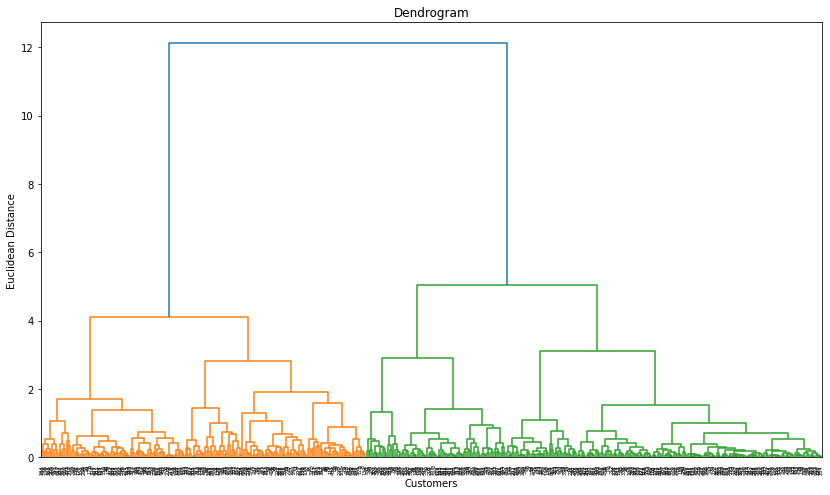

In [30]:
# Using dendrogram to find optimal number of clusters
plt.figure(figsize = (14,8))
dendrogram = sch.dendrogram(sch.linkage(X, method = "ward"))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distance")
plt.show()

So optimal number of cluster are 2

In [31]:
# Building Hierarchical Cluster model

# Create an object of AgglomerativeClustering
cluster_model = AgglomerativeClustering(n_clusters = 2, affinity = "euclidean", linkage = "ward")

# Fit the model
predictions = cluster_model.fit_predict(X)

In [32]:
# Print predictions
predictions

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,

In [33]:
# Create column called cluster and append prediction to it
X["Cluster"] = predictions
X.head()

Channel    Region     Fresh      Milk   Grocery    Frozen  \
0  0.000112  0.000168  0.708333  0.539874  0.422741  0.011965   
1  0.000125  0.000188  0.442198  0.614704  0.599540  0.110409   
2  0.000125  0.000187  0.396552  0.549792  0.479632  0.150119   
3  0.000065  0.000194  0.856837  0.077254  0.272650  0.413659   
4  0.000079  0.000119  0.895416  0.214203  0.284997  0.155010   

   Detergents_Paper  Delicassen  Cluster  
0          0.149505    0.074809        1  
1          0.206342    0.111286        1  
2          0.219467    0.489619        1  
3          0.032749    0.115494        0  
4          0.070358    0.205294        0

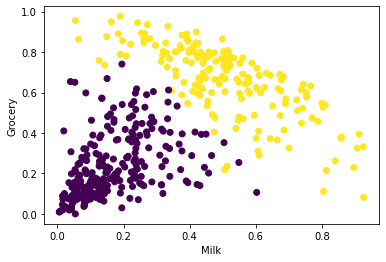

In [34]:
# Visualizing Clusters

# Between Milk and Grocery
plt.scatter(x = X["Milk"], y = X["Grocery"], c = X["Cluster"])
plt.xlabel("Milk")
plt.ylabel("Grocery")
plt.show()

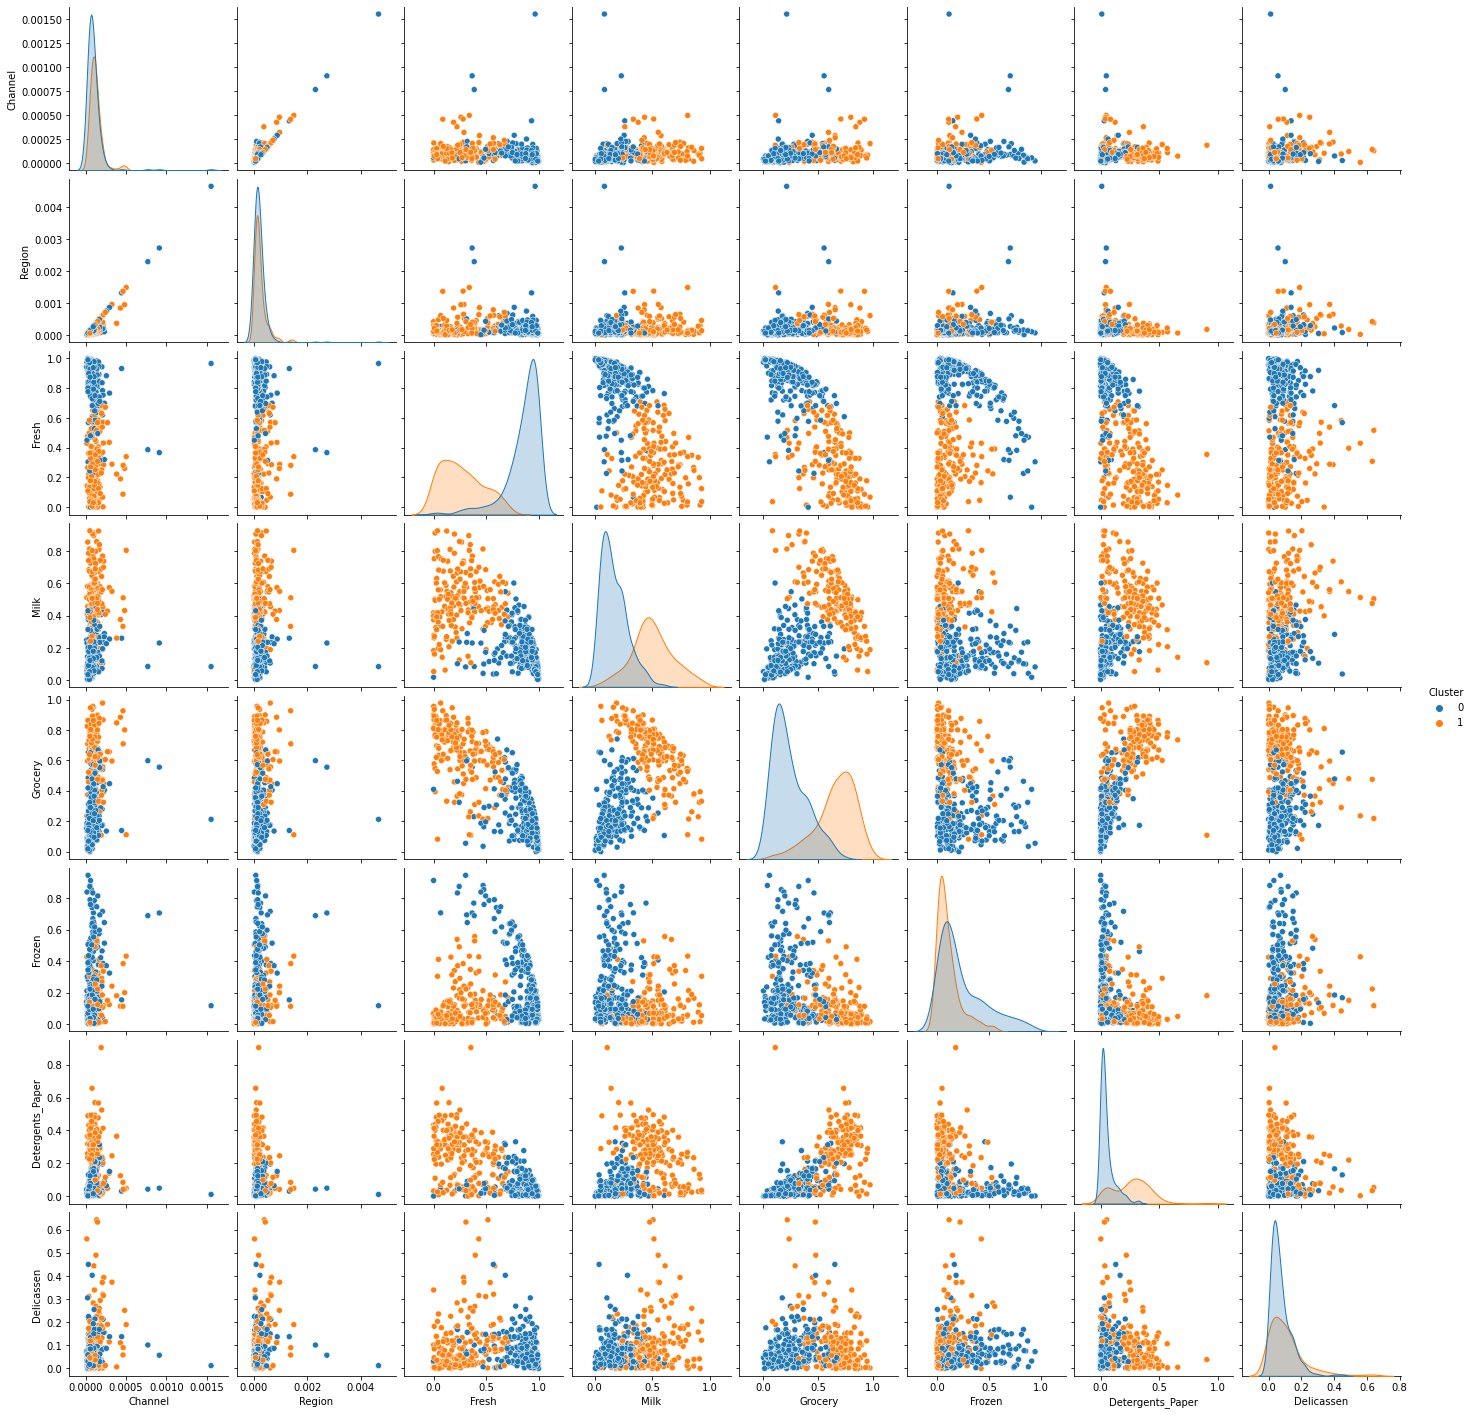

In [20]:
# Visualize Clusters
sns.pairplot(X, hue = "Cluster")